In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import re

In [2]:
## Find all .csv in specified directory
# directory path
dir = r"project_datasets\\"
# glob finds and puts all the file paths into a list
all_files = glob.glob(dir + "*.csv")

In [3]:
## Using RegEx take the name and format it (Format => "df_A")
pattern = re.compile(r'(?<=\\)(.*?)(?=\.)')
def get_file_names(x):
    files = x
    saved = []
    for file in files:
        for name in re.findall(pattern, file):
            name = name.replace("data","df")
            ## .lower() could be removed it's just that our existing document uses lower case (df_a, df_d)
            name = name.lower()
            saved.append(name)
    return saved

In [4]:
## Read all the file name and paths and assign them to variable
dataframe_names = get_file_names(all_files)
for index, item in enumerate(dataframe_names):
    globals()['%s' % item] = pd.read_csv(all_files[index])


In [5]:
print("Available Dataframes:")
print(dataframe_names)

Available Dataframes:
['df_a', 'df_aa', 'df_ab', 'df_ac', 'df_ad', 'df_b', 'df_c', 'df_d', 'df_e', 'df_f', 'df_g', 'df_h', 'df_i', 'df_j', 'df_k', 'df_m', 'df_n', 'df_o', 'df_p', 'df_q', 'df_r', 'df_s', 'df_t', 'df_u', 'df_v', 'df_w', 'df_x', 'df_y', 'df_z']


In [6]:
## Convert all column types to date_time
for item in dataframe_names:
    globals()['%s' % item]["EventDt"] = pd.to_datetime(globals()['%s' % item]["EventDt"])
    globals()['%s' % item] = globals()['%s' % item].set_index(globals()['%s' % item]["EventDt"])
    globals()['%s' % item].drop(columns={"EventDt","DeviceId"})
    globals()['%s' % item] = globals()['%s' % item].resample(rule="D").mean()

In [7]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1097 entries, 2018-11-18 to 2021-11-18
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    907 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


In [8]:
df_a

,Temp
EventDt,
2018-11-18,19.352340
2018-11-19,19.336701
2018-11-20,19.314375
2018-11-21,19.381285
2018-11-22,19.389479
...,...
2021-11-14,21.426111
2021-11-15,21.172465
2021-11-16,20.688993


In [27]:
average_temps = []
for item in dataframe_names:
#     mean_temp = globals()['%s' % item]["Temp"].mean()
    mean_temp = globals()['%s' % item]["Temp"].quantile(.35)
    average_temps.append(mean_temp)
    
mean_temp_dev_dictionary = {"Device":dataframe_names,"Mean Temperature":average_temps}
mean_temp_dev = pd.DataFrame.from_dict(mean_temp_dev_dictionary)
mean_temp_dev

,Device,Mean Temperature
0,df_a,17.265858
1,df_aa,-19.874726
2,df_ab,18.760875
3,df_ac,21.860069
4,df_ad,19.459076
5,df_b,5.587681
6,df_c,14.479108
7,df_d,17.176597
8,df_e,-24.092597
9,df_f,19.346049


[Text(0.5, 1.0, 'Categories')]

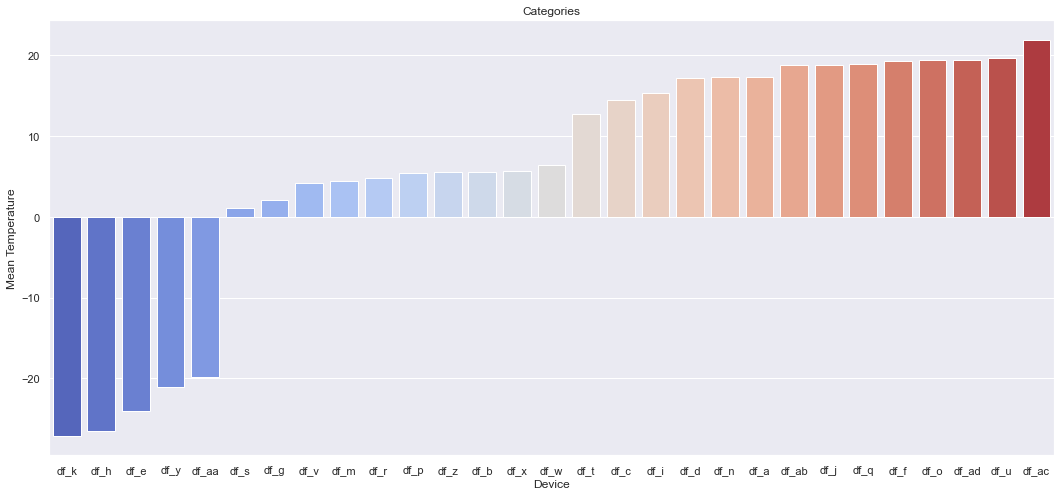

In [28]:
#sns.set_theme(style="whitegrid")
#sns.set_palette(sns.color_pallete("icefire"),as_cmap=True)
sns.set(rc={'figure.figsize':(18,8)})
sns.barplot(x="Device", 
            y="Mean Temperature", 
            data=mean_temp_dev,
            order=mean_temp_dev.sort_values('Mean Temperature').Device,
            palette = "coolwarm").set(title='Categories')

In [11]:
## If the code is confusing TLDR:
## - All dataframes are imported (df_a,df_aa, etc...)
## - mean_temp_dev dataframe has the names of all dataframes and their average temperature

In [12]:
#barchart per category
#check the order
mean_temp_dev.sort_values(by='Mean Temperature',ascending=True)

,Device,Mean Temperature
14,df_k,-27.069417
11,df_h,-26.550584
8,df_e,-24.092597
27,df_y,-21.047639
1,df_aa,-19.874726
21,df_s,1.104590
10,df_g,2.030444
24,df_v,4.130056
15,df_m,4.373264
20,df_r,4.805451


In [13]:
#categories
categories = []
#mean = mean_temp_dev['Mean Temperature']
for value in mean_temp_dev['Mean Temperature']:
    if value < 0: categories.append('Freezer')
#     elif  -10 < value < 0: categories.append('Refrigerator')
    elif 0 <= value < 10: categories.append('Fridge')
    elif 10 <= value :categories.append('Pantry')
    else: categories.append('unknown')
        
#mean_temp_dev['Mean Temperature'] = mean_temp_dev['Mean Temperature'].map(categories)
mean_temp_dev['Categories']  = categories
mean_temp_dev

,Device,Mean Temperature,Categories
0,df_a,17.265858,Pantry
1,df_aa,-19.874726,Freezer
2,df_ab,18.760875,Pantry
3,df_ac,21.860069,Pantry
4,df_ad,19.459076,Pantry
5,df_b,5.587681,Fridge
6,df_c,14.479108,Pantry
7,df_d,17.176597,Pantry
8,df_e,-24.092597,Freezer
9,df_f,19.346049,Pantry


(array([0, 1, 2]),
 [Text(0, 0, 'Freezer'), Text(1, 0, 'Fridge'), Text(2, 0, 'Pantry')])

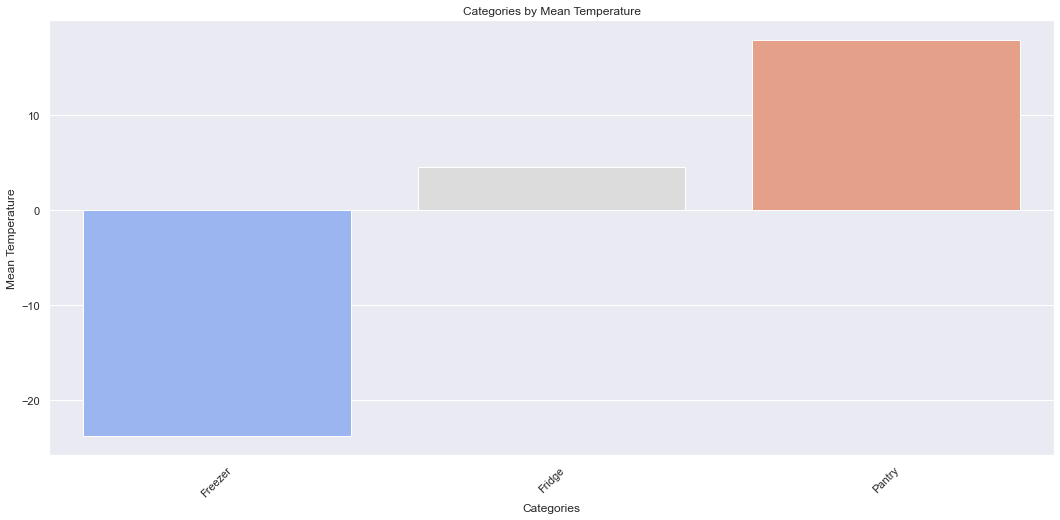

In [14]:
#barchart per group
sns.barplot(data=mean_temp_dev,
                x="Categories",
                y="Mean Temperature",
                palette = "coolwarm",
                ci=None,
                order=["Freezer", "Fridge","Pantry"])
plt.title('Categories by Mean Temperature')
plt.xticks(rotation=45)

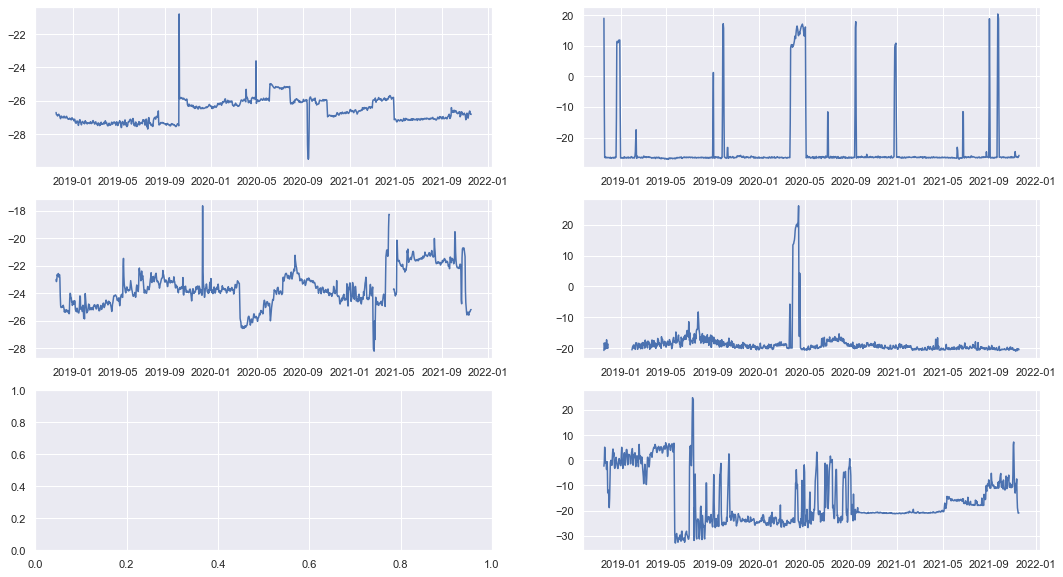

In [69]:
#freezer
#pic size
fig, axes = plt.subplots(3,2, figsize=(18,10))
#fix the date and maybe zoom in or smt
axes[0,0].plot(df_k["Temp"])
axes[0,1].plot(df_h["Temp"])
axes[1,0].plot(df_e["Temp"])
axes[1,1].plot(df_aa["Temp"])
axes[2,1].plot(df_y["Temp"])
#sns.lineplot(x='EventDt', y='Temp', data=df_y, ax=axes[0,2])


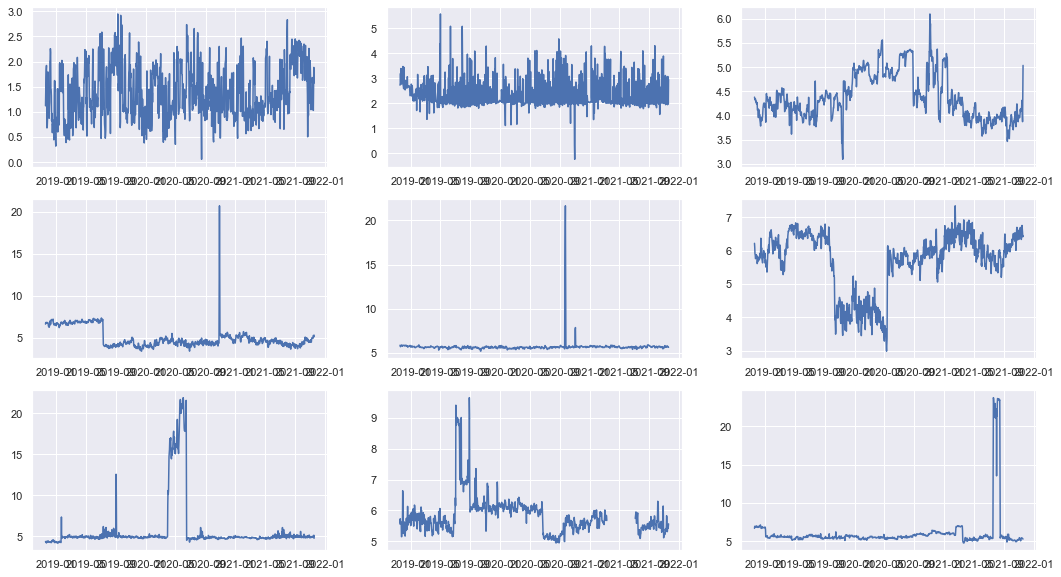

In [16]:
#refrigerator
#pic size
fig, axes = plt.subplots(3,3, figsize=(18,10))
#fix the date and maybe zoom in or smt
axes[0,0].plot(df_s["Temp"])
axes[0,1].plot(df_g["Temp"])
axes[0,2].plot(df_v["Temp"])
axes[1,0].plot(df_m["Temp"])
axes[1,1].plot(df_b["Temp"])
axes[1,2].plot(df_x["Temp"])
axes[2,0].plot(df_r["Temp"])
axes[2,1].plot(df_z["Temp"])
axes[2,2].plot(df_p["Temp"])

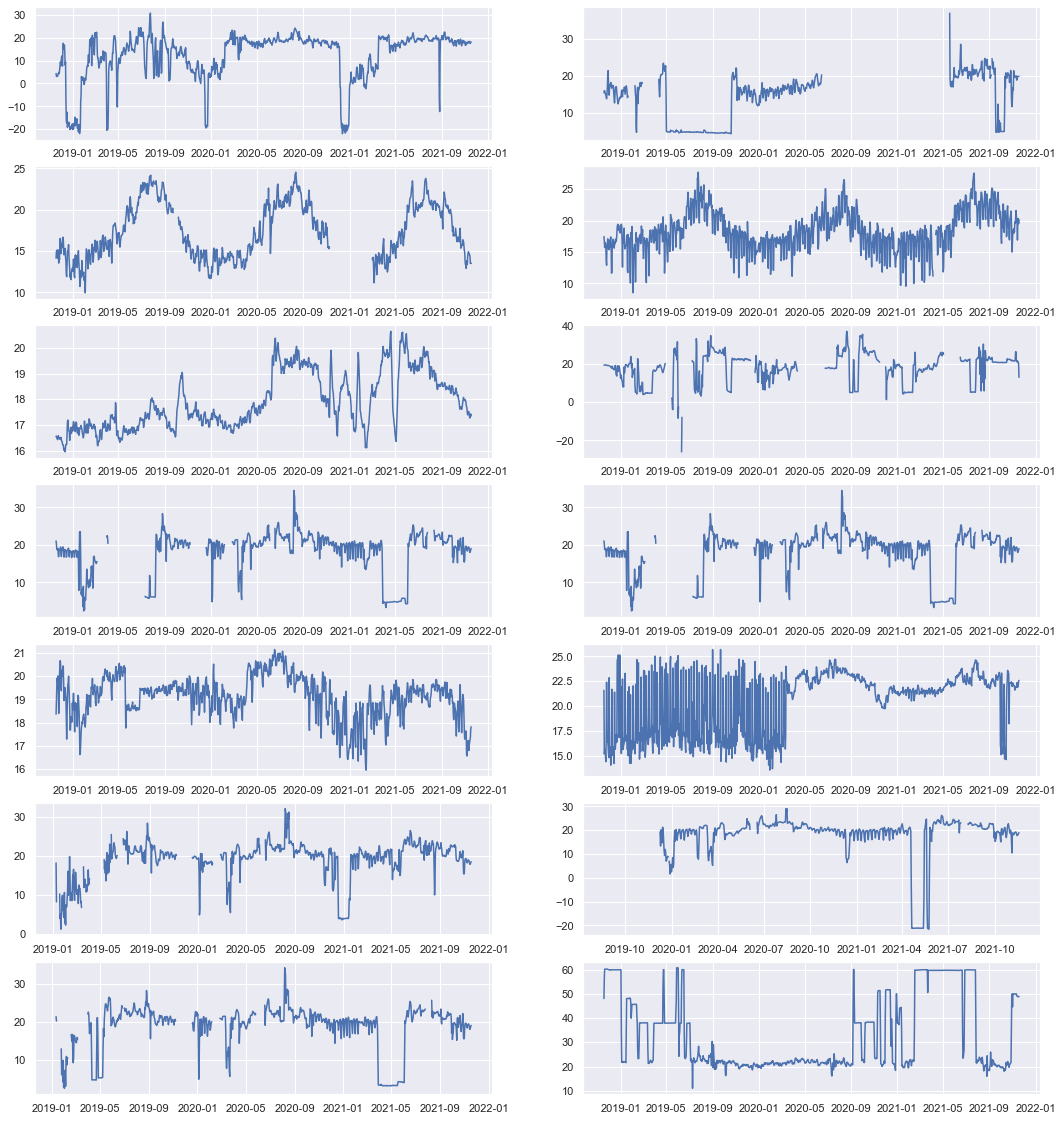

In [29]:
fig, axes = plt.subplots(7,2, figsize=(18,20))
axes[0,0].plot(df_t["Temp"])
axes[0,1].plot(df_c["Temp"])
axes[1,0].plot(df_i["Temp"])
axes[1,1].plot(df_d["Temp"])
axes[2,0].plot(df_n["Temp"])
axes[2,1].plot(df_a["Temp"])
axes[3,0].plot(df_ab["Temp"])
axes[3,1].plot(df_j["Temp"])
axes[4,0].plot(df_q["Temp"])
axes[4,1].plot(df_f["Temp"])
axes[5,0].plot(df_o["Temp"])
axes[5,1].plot(df_ad["Temp"])
axes[6,0].plot(df_u["Temp"])
axes[6,1].plot(df_ac["Temp"])

In [18]:
# t, ac, c - Changing enviornment
# i,d - Seasonality (Uncontrolled temperature)
# k,s,v,m,b,x... - Easy 5 min prediction (Consistent/Low irregularities)

<AxesSubplot:xlabel='EventDt'>

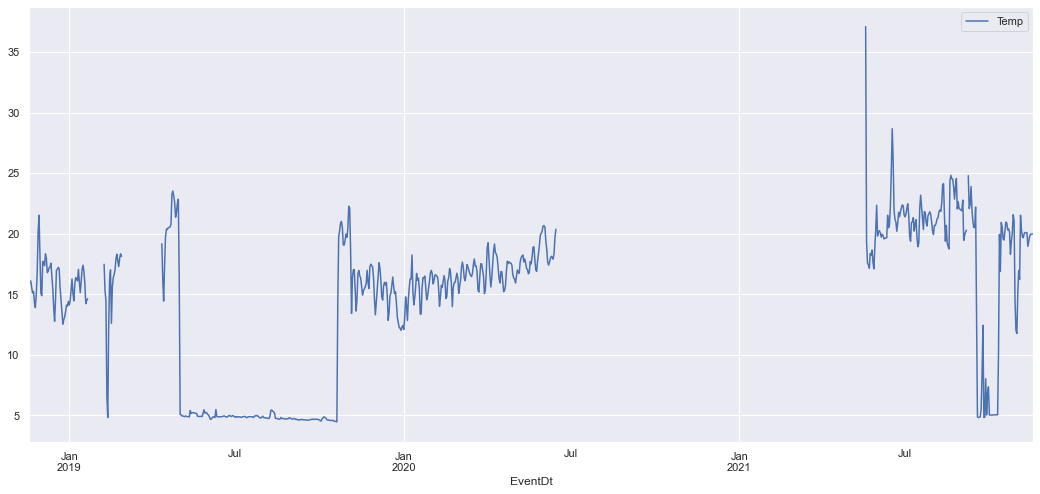

In [19]:
## df_c changes category depending on whether we use 35% quantile or 65%
df_c.plot(y="Temp")

<AxesSubplot:xlabel='EventDt'>

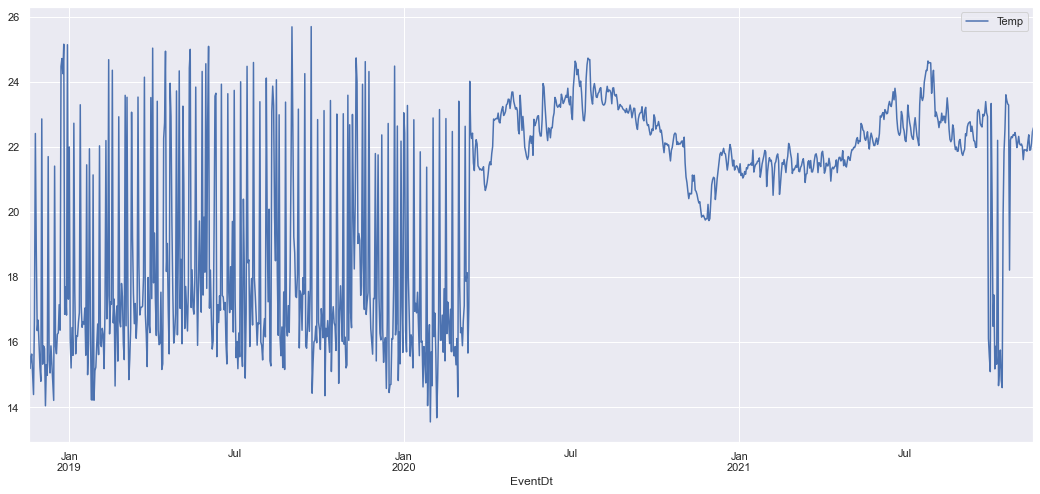

In [20]:
df_f.plot(y="Temp")

In [70]:
## Freezer k, aa, h
## Fridge b, s ,g
## Pantry i, d, ab

In [71]:
## 3 devices for 3 categories
## do all Boxplots
## Zoomie Zoomie 2 Weeks
## See parterns 
## Analyze more